In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [ ]:
from google.colab import files
uploaded= files.upload()

Saving creditcard.csv.zip to creditcard.csv.zip


In [ ]:
df = pd.read_csv('creditcard.csv.zip')  # Example dataset
X = df.drop('Class', axis=1)
y = df['Class']

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

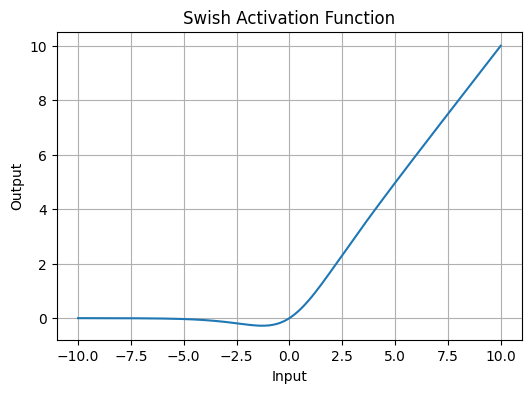

In [ ]:
def swish(x):
    return x * tf.nn.sigmoid(x)
    import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

# Plotting the activation function
x_vals = np.linspace(-10, 10, 200)
y_vals = swish(x_vals)

plt.figure(figsize=(6,4))
plt.plot(x_vals, y_vals)
plt.title("Swish Activation Function")
plt.xlabel("Input")
plt.ylabel("Output")
plt.grid(True)
plt.show()



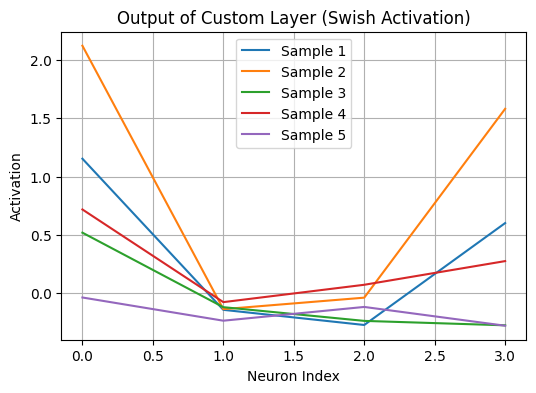

In [ ]:
class CustomDense(tf.keras.layers.Layer):
    def __init__(self, units):
        super(CustomDense, self).__init__()
        self.units = units

    def build(self, input_shape):
        self.w = self.add_weight(shape=(input_shape[-1], self.units),
                                 initializer='glorot_uniform',
                                 trainable=True)
        self.b = self.add_weight(shape=(self.units,),
                                 initializer='zeros',
                                 trainable=True)

    def call(self, inputs):
        return swish(tf.matmul(inputs, self.w) + self.b)
        # Define a small batch of inputs
sample_input = tf.convert_to_tensor(X_train[:5], dtype=tf.float32)

# Instantiate the layer manually
layer = CustomDense(4)  # small layer for visualization
layer.build(sample_input.shape)

# Forward pass
output = layer(sample_input)

# Plot outputs
plt.figure(figsize=(6,4))
for i in range(output.shape[0]):
    plt.plot(output[i], label=f'Sample {i+1}')
plt.title("Output of Custom Layer (Swish Activation)")
plt.xlabel("Neuron Index")
plt.ylabel("Activation")
plt.legend()
plt.grid(True)
plt.show()



In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)),
    CustomDense(32),
    tf.keras.layers.Dropout(0.3),
    CustomDense(16),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [ ]:
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.1)


Epoch 1/20
6409/6409 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 0.9830 - loss: 0.0556 - val_accuracy: 0.9995 - val_loss: 0.0022
Epoch 2/20
6409/6409 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - accuracy: 0.9993 - loss: 0.0041 - val_accuracy: 0.9995 - val_loss: 0.0021
Epoch 3/20
6409/6409 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.9994 - loss: 0.0033 - val_accuracy: 0.9995 - val_loss: 0.0022
Epoch 4/20
6409/6409 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.9993 - loss: 0.0035 - val_accuracy: 0.9994 - val_loss: 0.0021
Epoch 5/20
6409/6409 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.9994 - loss: 0.0028 - val_accuracy: 0.9995 - val_loss: 0.0020
Epoch 6/20
6409/6409 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 0.9995 - loss: 0.0027 - val_accuracy: 0.9996 - val_loss: 0.0018
Epoch 7/20
6409/6409 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.9994 - loss: 0.0031 - val_accuracy: 0.9996 - val_loss: 0.0019
Epoch 8/20
6409/6409 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - accuracy: 0.9994 - loss: 0

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")


1781/1781 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9993 - loss: 0.0035
Test Accuracy: 0.9993
